# Módulo 1: Análisis de datos en el ecosistema Python

### Sesión (18)

**30/01/2023**

## Aplicar un caso de uso (*Clasificación*)

In [1]:
# importamos las librerías necesarias 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
# Modificamos los parámetros de los gráficos en matplotlib
from matplotlib.pyplot import rcParams

rcParams['figure.figsize'] = 12, 6 # el primer dígito es el ancho y el segundo el alto
rcParams["font.weight"] = "bold"
rcParams["font.size"] = 10
rcParams["axes.labelweight"] = "bold"

### Dataset de cubierta forestal

**[Forest Covertype data](https://archive.ics.uci.edu/ml/datasets/Covertype)** es un conjunto de datos cargado en la librería _sklearn_ que permite realizar un ejercicio tipo problemas de **clasificación**. El objetivo de este dataset es **estudiar las variables cartográficas** para poder **predecir el tipo de cubierta forestal**. El tipo real de cubierta forestal para una observación (celda de 30 x 30 metros) se ha determinado a partir de los datos del **Servicio Forestal de EE.UU. (USFS)**. 

Los datos están en forma **cruda** (sin escalar) y contienen columnas binarias (0 o 1) de datos para variables independientes cualitativas (áreas silvestres y tipos de suelo).

Estas áreas de estudio representan **bosques con mínimas perturbaciones causadas por el hombre**, por lo que los tipos de cubierta forestal existentes son más el **resultado de procesos ecológicos**, que de prácticas de gestión forestal.

### Análisis Exploratorio Inicial, Tratamiento y Limpieza de datos

In [3]:
from sklearn.datasets import fetch_covtype

# Construimos un dataframe con los datos medidos de la cubierta forestal
dataset_cub = pd.DataFrame(fetch_covtype()["data"], columns=fetch_covtype()["feature_names"])

# Añadimos la variable objetivo
dataset_cub['target'] = fetch_covtype()["target"]

dataset_cub

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,target
0,2596.0,51.0,3.0,258.0,0.0,510.0,221.0,232.0,148.0,6279.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,2590.0,56.0,2.0,212.0,-6.0,390.0,220.0,235.0,151.0,6225.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
2,2804.0,139.0,9.0,268.0,65.0,3180.0,234.0,238.0,135.0,6121.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,2785.0,155.0,18.0,242.0,118.0,3090.0,238.0,238.0,122.0,6211.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,2595.0,45.0,2.0,153.0,-1.0,391.0,220.0,234.0,150.0,6172.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396.0,153.0,20.0,85.0,17.0,108.0,240.0,237.0,118.0,837.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
581008,2391.0,152.0,19.0,67.0,12.0,95.0,240.0,237.0,119.0,845.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
581009,2386.0,159.0,17.0,60.0,7.0,90.0,236.0,241.0,130.0,854.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
581010,2384.0,170.0,15.0,60.0,5.0,90.0,230.0,245.0,143.0,864.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3


Vamos a sacar un dataset mucho más pequeño para **simplificar los cálculos** y **reducir el tiempo de computación** de los algoritmos. Una primera idea para extraer un subconjunto podría ser quedarnos por ejemplo con los **_100.000_ primeros registros** de la tabla.

In [4]:
dataset_cub[0:100000]

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,target
0,2596.0,51.0,3.0,258.0,0.0,510.0,221.0,232.0,148.0,6279.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,2590.0,56.0,2.0,212.0,-6.0,390.0,220.0,235.0,151.0,6225.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
2,2804.0,139.0,9.0,268.0,65.0,3180.0,234.0,238.0,135.0,6121.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,2785.0,155.0,18.0,242.0,118.0,3090.0,238.0,238.0,122.0,6211.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,2595.0,45.0,2.0,153.0,-1.0,391.0,220.0,234.0,150.0,6172.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,3100.0,52.0,16.0,376.0,50.0,3816.0,227.0,203.0,105.0,4295.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
99996,3090.0,50.0,16.0,361.0,40.0,3840.0,225.0,202.0,106.0,4268.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
99997,3083.0,45.0,18.0,335.0,33.0,3864.0,222.0,198.0,104.0,4241.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
99998,3077.0,41.0,15.0,309.0,43.0,3889.0,221.0,205.0,116.0,4214.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


El posible peligro de este enfoque es que **no obtengamos un subconjunto muy representativo**. Realizamos una consulta sobre una de las variables del datset para ver si estadísticamente tienen las mismas características o no. 

In [5]:
dataset_cub['Elevation'].describe()[['count', 'mean', 'std']]

count    581012.000000
mean       2959.365301
std         279.984734
Name: Elevation, dtype: float64

In [6]:
dataset_cub[0:100000]['Elevation'].describe()[['count', 'mean', 'std']]

count    100000.000000
mean       2862.036680
std         231.376584
Name: Elevation, dtype: float64

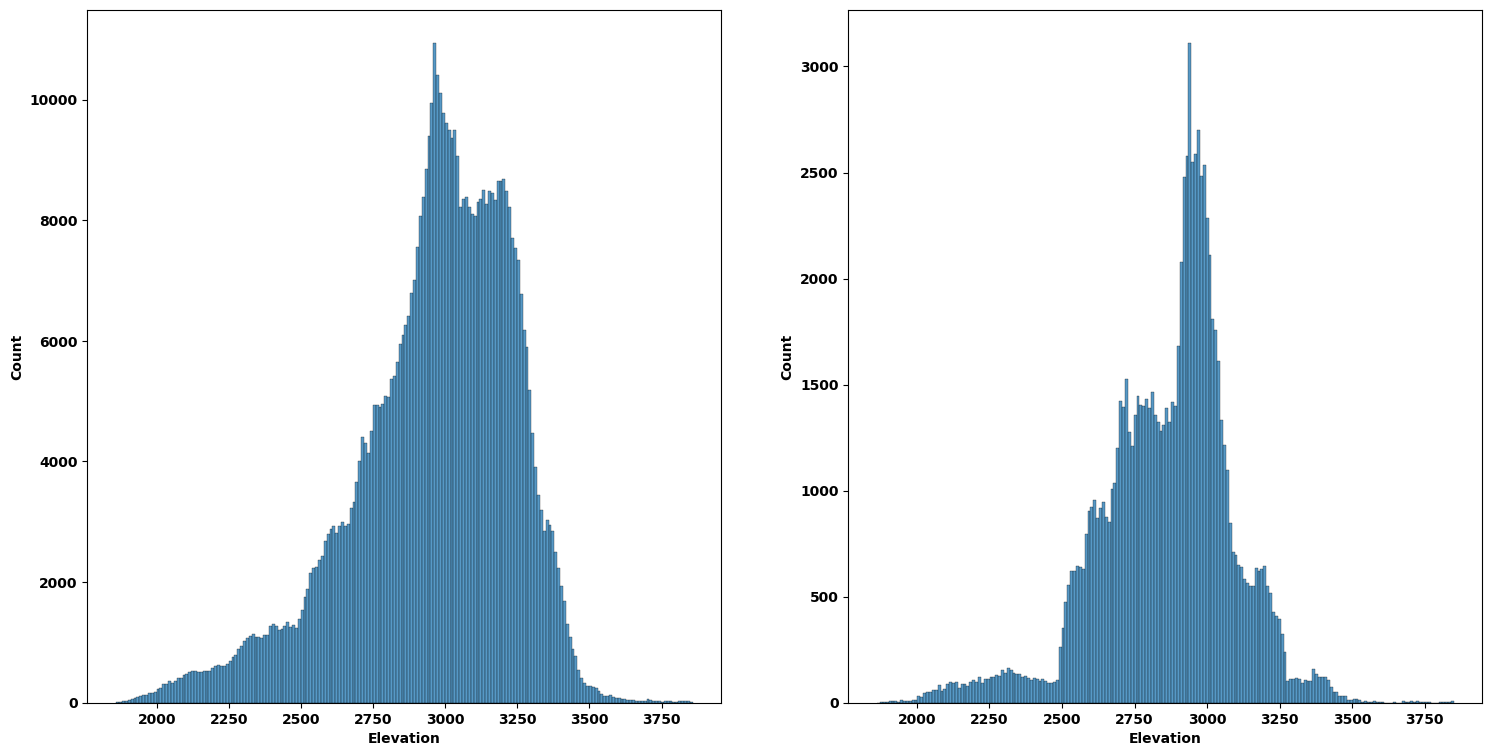

In [7]:
# Comparar la distribución de la variable "Elevation" entre los dos Dataframes
fig, axes = plt.subplots(1, 2, figsize=(18,9))
sns.histplot(dataset_cub['Elevation'], bins=200, ax=axes[0])
sns.histplot(dataset_cub[0:100000]['Elevation'], bins=200, ax=axes[1])
plt.show()

Se puede observar que la variable analizada no tiene la misma representación en el subconjunto de los _100.000_ primeros registros del dataset. Otra opción para conseguir un trozo de los datos originales, sería aplicar la técnica de **remuestro aleatorio (_random resampling_)**.

Vamos a hacer un remuestreo aleatorio para **quedarnos aproximadamente con el 17% de los datos** usando el método **[sample](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sample.html)** sobre los _DataFrames_ de la librería _pandas_:

In [8]:
100/6

16.666666666666668

In [9]:
df_cub = dataset_cub.sample(frac=1/5.81012, random_state=222).reset_index(drop=True)
df_cub

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,target
0,3311.0,3.0,13.0,551.0,106.0,2780.0,202.0,215.0,149.0,2220.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,7
1,2429.0,70.0,29.0,95.0,18.0,1589.0,237.0,169.0,43.0,391.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
2,2324.0,315.0,14.0,124.0,43.0,391.0,182.0,228.0,185.0,560.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
3,2959.0,346.0,10.0,90.0,20.0,5876.0,200.0,223.0,162.0,3979.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,2910.0,62.0,15.0,330.0,97.0,3246.0,231.0,208.0,106.0,2275.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2908.0,59.0,15.0,633.0,271.0,1036.0,230.0,208.0,107.0,577.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
99996,2379.0,292.0,21.0,95.0,37.0,1321.0,155.0,230.0,213.0,330.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6
99997,2786.0,147.0,7.0,42.0,7.0,2162.0,229.0,239.0,143.0,1574.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
99998,2863.0,36.0,10.0,514.0,26.0,2746.0,219.0,217.0,132.0,3550.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2


In [10]:
# Consultamos las principales esdadísticas de la variable analizada anteriormente
df_cub['Elevation'].describe()[['count', 'mean', 'std']]

count    100000.000000
mean       2959.010060
std         279.864034
Name: Elevation, dtype: float64

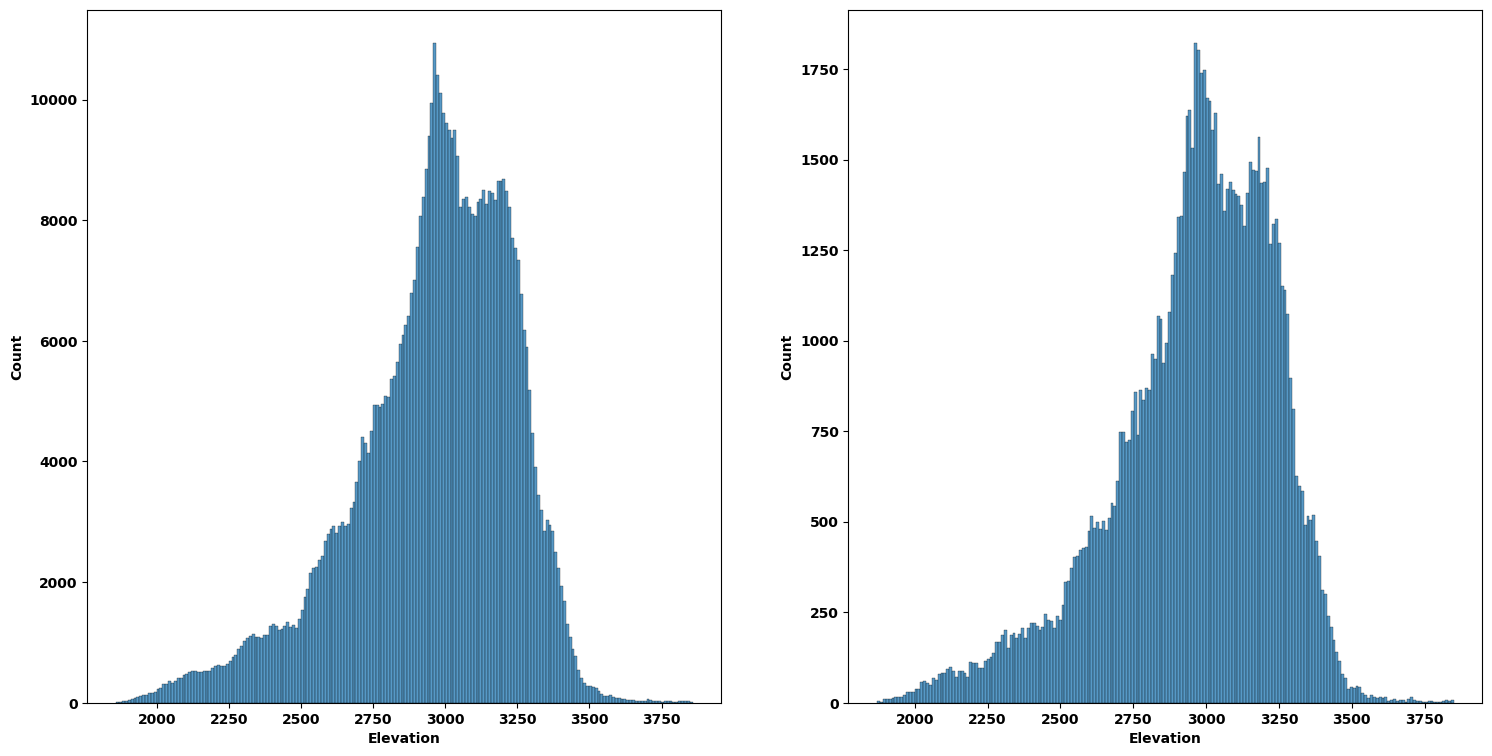

In [11]:
# Comparar la distribución de la variable "Elevation" entre el DataFrame original y el subconjunto obtenido mediante el remuestreo aleatorio
fig, axes = plt.subplots(1, 2, figsize=(18,9))
sns.histplot(dataset_cub['Elevation'], bins=200, ax=axes[0])
sns.histplot(df_cub['Elevation'], bins=200, ax=axes[1])
plt.show()

Podemos ver que este último subconjunto, a pesar de tener solamente 17% de los datos, **sí que incluye un set de observaciones muy representativas** respecto al dataset original. 

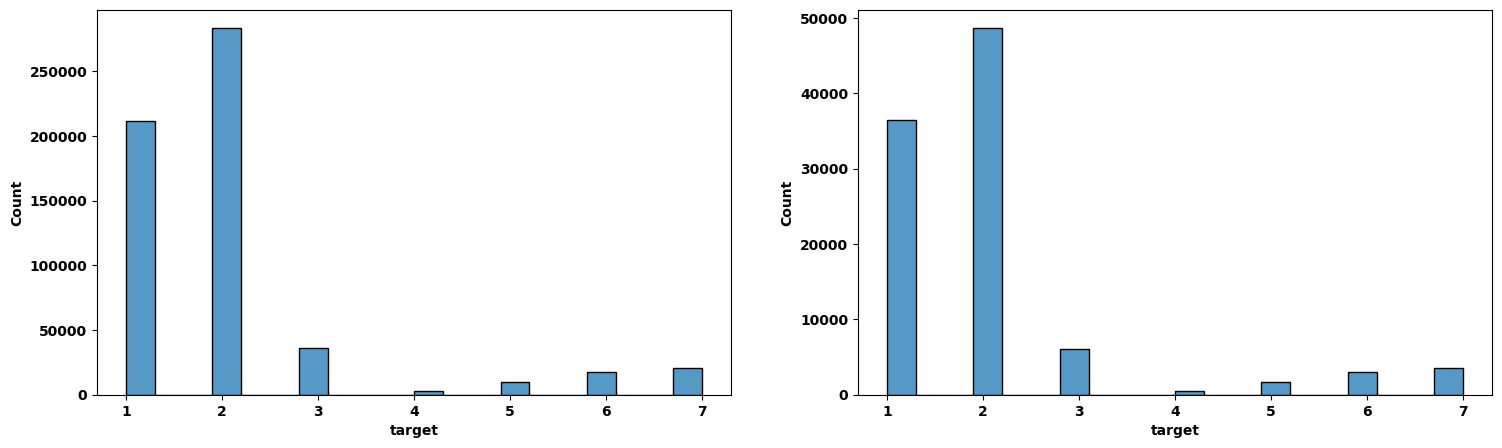

In [12]:
# Comparar la distribución de la variable objetivo entre los dos Dataframes
fig, axes = plt.subplots(1, 2, figsize=(18,5))
sns.histplot(dataset_cub['target'], bins=20, ax=axes[0])
sns.histplot(df_cub['target'], bins=20, ax=axes[1])
plt.show()

In [13]:
df_cub.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,target
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000
mean,2959.010060,155.927130,14.078440,268.415310,45.890660,2356.444880,212.226180,223.392060,142.541110,1984.702670,...,0.091120,0.078660,0.003050,0.003510,0.000190,0.000510,0.026360,0.023650,0.014600,2.05919
std,279.864034,111.880189,7.466349,212.389266,57.923415,1559.881883,26.567206,19.768911,38.116316,1328.355754,...,0.287781,0.269209,0.055143,0.059141,0.013783,0.022578,0.160204,0.151957,0.119946,1.40864
min,1871.000000,0.000000,0.000000,0.000000,-164.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000
25%,2810.000000,59.000000,9.000000,108.000000,7.000000,1110.000000,198.000000,213.000000,119.000000,1022.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000
50%,2995.000000,127.000000,13.000000,218.000000,29.000000,2005.000000,218.000000,226.000000,143.000000,1712.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.00000
75%,3163.000000,261.000000,18.000000,384.000000,68.000000,3336.000000,231.000000,237.000000,168.000000,2553.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.00000
max,3849.000000,360.000000,66.000000,1390.000000,592.000000,7117.000000,254.000000,254.000000,253.000000,7168.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.00000


In [14]:
df_cub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Elevation                           100000 non-null  float64
 1   Aspect                              100000 non-null  float64
 2   Slope                               100000 non-null  float64
 3   Horizontal_Distance_To_Hydrology    100000 non-null  float64
 4   Vertical_Distance_To_Hydrology      100000 non-null  float64
 5   Horizontal_Distance_To_Roadways     100000 non-null  float64
 6   Hillshade_9am                       100000 non-null  float64
 7   Hillshade_Noon                      100000 non-null  float64
 8   Hillshade_3pm                       100000 non-null  float64
 9   Horizontal_Distance_To_Fire_Points  100000 non-null  float64
 10  Wilderness_Area_0                   100000 non-null  float64
 11  Wilderness_Area_1          

In [15]:
# Conteo de valores perdidos/faltantes  
df_cub.isna().sum().sum()

0

In [16]:
# Consultamos los registros que tienen algún valor nulo
df_cub.drop(df_cub.dropna().index)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,target


### Reducción de Variables (___Dimensionality Reduction___)

### **`Ejercicio 18.1`**

Para conseguir un dataset con una dimensión reducidad, aplica la técnica de **Selección de variables basada en árbol de decisión** mediante las importancias de cada variable (**`Decision Trees Importances`**):

- Filtra el tablón para quedarnos solamente con **las variables que aglutinan hasta el `95%` de la información** que se requiere para estimar la variable objetivo.
- `random_state=100`

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

#Dividimos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(dataset_cub.drop('target', axis=1),dataset_cub['target'],test_size=0.2, 
random_state=100)

#Entrenamos un modelo de árbol de decisión y obtenemos la importancia de cada variable
model = DecisionTreeRegressor(random_state=100)
model.fit(X_train, y_train)
importancias = model.feature_importances_

#Ordenamos las variables de mayor a menor importancia:
indices = importancias.argsort()[::-1]

#Calculamos la suma acumulada de la importancia de cada variable
importancias_acumulativas = np.cumsum(importancias[indices])

#Seleccionamos las variables que aglutinan hasta el 95% de la información necesaria para estimar la variable objetivo
selected_indices = np.where(importancias_acumulativas <= 0.95)[0]
selected_columns = X_train.columns[indices[selected_indices]]
selected_columns

#Tendremos una lista con los nombres de las variables seleccionadas.
#Podemos utilizar esta lista para filtrar el conjunto de datos original y quedarnos solo con las variables seleccionadas
data_selected = dataset_cub[selected_columns]
data_selected

,Elevation,Horizontal_Distance_To_Roadways,Horizontal_Distance_To_Fire_Points,Wilderness_Area_2,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Soil_Type_31,Aspect,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Wilderness_Area_1,Soil_Type_38,Slope,Wilderness_Area_0,Soil_Type_37,Soil_Type_32,Soil_Type_34
0,2596.0,510.0,6279.0,0.0,258.0,0.0,0.0,51.0,221.0,232.0,148.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0
1,2590.0,390.0,6225.0,0.0,212.0,-6.0,0.0,56.0,220.0,235.0,151.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0
2,2804.0,3180.0,6121.0,0.0,268.0,65.0,0.0,139.0,234.0,238.0,135.0,0.0,0.0,9.0,1.0,0.0,0.0,0.0
3,2785.0,3090.0,6211.0,0.0,242.0,118.0,0.0,155.0,238.0,238.0,122.0,0.0,0.0,18.0,1.0,0.0,0.0,0.0
4,2595.0,391.0,6172.0,0.0,153.0,-1.0,0.0,45.0,220.0,234.0,150.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396.0,108.0,837.0,1.0,85.0,17.0,0.0,153.0,240.0,237.0,118.0,0.0,0.0,20.0,0.0,0.0,0.0,0.0
581008,2391.0,95.0,845.0,1.0,67.0,12.0,0.0,152.0,240.0,237.0,119.0,0.0,0.0,19.0,0.0,0.0,0.0,0.0
581009,2386.0,90.0,854.0,1.0,60.0,7.0,0.0,159.0,236.0,241.0,130.0,0.0,0.0,17.0,0.0,0.0,0.0,0.0
581010,2384.0,90.0,864.0,1.0,60.0,5.0,0.0,170.0,230.0,245.0,143.0,0.0,0.0,15.0,0.0,0.0,0.0,0.0


---

### **`Ejercicio 18.2`**

Después de filtrar el dataset vamos a plantear un **problema de clasificación** para conseguir un **clasificador de la cubierta forestal** en basea a las **variables cartográficas**.:  

**`18.2.1`** Genera una gráfica para visualizar la distribución de las variables del datset en conjunto. Analiza dicha gráfica y explica si hay una necesidad de normalizar los datos.  

**`18.2.2`** Normaliza todas las variables del dataset a una escala estándar. Para ello puedes realizar estas transformaciones:

- LLevar las variables de entrada a una escala de `0` a `1`
- Convertir la variable objetivo en valores numéricos **entre 0 y el número de clases menos 1**

<AxesSubplot:>

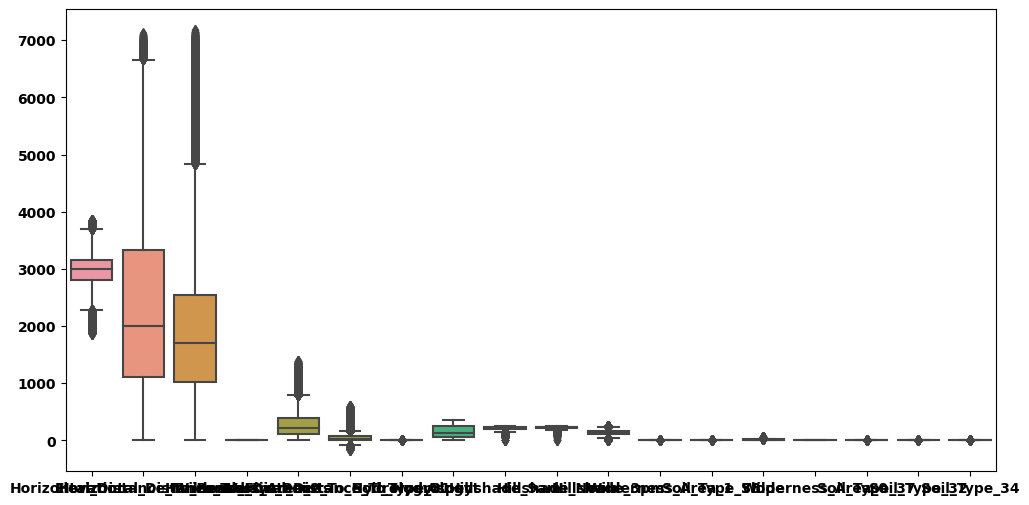

In [18]:
#18.2.1
#Para visualizar la distribución de las variables del dataset en conjunto podemos utilizar un diagrama de caja
sns.boxplot(data=data_selected)

Vemos que las distribuciones son muy diferentes entre sí, por lo que sí necesario normalizar los datos para evitar que algunas variables tengan más peso que otras en el modelo de clasificación

In [19]:
#18.2.2
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

# Separar las variables de entrada y la variable objetivo
X = dataset_cub.drop('target', axis=1)
y = dataset_cub['target']

# Normalizar las variables de entrada a una escala de 0 a 1
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Convertir la variable objetivo en valores numéricos entre 0 y el número de clases menos 1
encoder = LabelEncoder()
y = encoder.fit_transform(y)

---

### **`Ejercicio 18.3`**

Después de estandarizar los datos procedemos a crear el **primer clasificador**:  

**`18.3.1`** Divide el datset en _training_ y en _test_:
- Guarda el `20%` de los datos para testeo.
- `random_state=100`  

**`18.3.2`** Entrena un modelo de **regresión logística**:
- Número máximo de iteraciones igual a `1000`
- `random_state=100`

**`18.3.3`** Calcula diferentes métricas para evaluar este modelo y analiza su rendimiendo.
- Accuracy
- F1-score `(average='weighted')`
- Classification report `(zero_division=0)`
- Confusion matrix

In [20]:
#18.3.1

# Separar las variables de entrada y la variable objetivo
X = dataset_cub.drop('target', axis=1)
y = dataset_cub['target']

# Dividir el dataset en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [ ]:
#18.3.2

from sklearn.linear_model import LogisticRegression

# Crear un objeto de regresión logística
logreg = LogisticRegression(max_iter=1000, random_state=100)

# Entrenar el modelo en el conjunto de entrenamiento
logreg.fit(X_train, y_train)

In [ ]:
#18.3.3

from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

#Un valor alto de Accuracy y F1-score indica que el modelo tiene un buen desempeño en el conjunto de prueba.
#La Classification Report y la Confusion Matrix nos proporcionan información adicional sobre el desempeño del modelo en cada clase.

# Predecir las clases en el conjunto de prueba
y_pred = logreg.predict(X_test)

# Calcular la Accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calcular el F1-score
f1 = f1_score(y_test, y_pred, average='weighted')

# Imprimir el Classification Report
report = classification_report(y_test, y_pred, zero_division=0)
print(report)

# Imprimir la Confusion Matrix
matrix = confusion_matrix(y_test, y_pred)
print(matrix)

Su rendimiento es del 68%, por lo que tampoco es muy alto pero no está mal.

---

### **`Ejercicio 18.4`**

Ahora probamos la creación de otros modelo basados en **árboles de decisión**:  

**`18.4.1`** Entrena un modelo tipo **Decision Tree Classifire** y calcula las métricas correspondientes para analizar su rendimiento en comparación con el modelo anterior:
- `random_state=100`
- Accuracy
- F1-score `(average='weighted')`
- Classification report `(zero_division=0)`

**`18.4.2`** Saca la curva de complejidad del modelo _Decision Tree_ (**Model Complexity Curve**) y crea un nuevo clasificador **con el valor óptimo de la profundidad del árbol** según esta gráfica. Después saca las métricas correspondiente y analiza el rendimiento del modelo en comparación de los anteriores.
- `random_state=100`
- rango de profundidades:  de `2` a `30` __inclusive__

**`18.4.3`** Saca la gráfica de el *Learning Curve* para estos modelos, definiendo y aplicando una función que toma el valor del hiperparámetro como su entrada y dibuja la evolución del rendimiento del modelo para el conjunto de training y de test. Explica si este último modelo tiene preferencia o no, comparando con modelos anteriores.
- `random_state=100`
- (*Sugerencia*: No incluya más de 10 puntos en el eje horizontal y empieza la gráfica con un mínimo de _1000_ muestras para el modelo)

In [ ]:
#18.4.1

from sklearn.tree import DecisionTreeClassifier

# Crear un modelo de árbol de decisión
dtc = DecisionTreeClassifier(random_state=100)

# Entrenar el modelo en el conjunto de entrenamiento
dtc.fit(X_train, y_train)

# Predecir las clases en el conjunto de prueba
y_pred = dtc.predict(X_test)

# Calcular la Accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calcular el F1-score
f1 = f1_score(y_test, y_pred, average='weighted')

# Imprimir el Classification Report
report = classification_report(y_test, y_pred, zero_division=0)
print(report)

# Imprimir la Confusion Matrix
matrix = confusion_matrix(y_test, y_pred)
print(matrix)

Vemos que si entrenamos un modelo tipo Decision Tree Classifire, tenemos un rendimiento del 94%, por lo que es mucho mayor y mejor que cuando lo hicimos con el modelo de regresión logística.

En general, los modelos de árbol de decisión tienen la ventaja de ser más interpretables y explicables que los modelos de regresión logística. Sin embargo, pueden ser propensos al sobreajuste y pueden no generalizar bien a nuevos conjuntos de datos.

Igualmente, debemos elegir el modelo que tenga un mejor rendimiento en el conjunto de prueba y que sea más adecuado para el problema que estamos intentando resolver.

In [ ]:
#18.4.2

from sklearn.model_selection import validation_curve

# Crear un modelo de árbol de decisión
dtc = DecisionTreeClassifier(random_state=100)

# Definir el rango de profundidades
depth_range = range(2, 31)

# Calcular la precisión en el conjunto de entrenamiento y prueba para cada profundidad
train_scores, test_scores = validation_curve(dtc, X_train, y_train,param_name="max_depth",param_range=depth_range,
                                             cv=5, scoring="accuracy")

# Calcular la media y la desviación estándar de la precisión en cada profundidad
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Graficar la curva de complejidad
plt.figure(figsize=(10, 6))
plt.title('Model Complexity Curve')
plt.plot(depth_range, train_mean, label='Training Score', color='blue')
plt.fill_between(depth_range, train_mean - train_std, train_mean + train_std, alpha=0.15, color='blue')
plt.plot(depth_range, test_mean, label='Cross-Validation Score', color='green')
plt.fill_between(depth_range, test_mean - test_std, test_mean + test_std, alpha=0.15, color='green')
plt.legend()
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
#Creamos un nuevo modelo de árbol de decisión con la profundidad óptima y evaluamos su rendimiento en el conjunto de prueba

# Crear modelo de árbol de decisión con profundidad óptima
optimal_depth = 11
dtc = DecisionTreeClassifier(max_depth=optimal_depth, random_state=100)

# Entrenar modelo con datos de entrenamiento
dtc.fit(X_train, y_train)

# Hacer predicciones en datos de prueba
y_pred = dtc.predict(X_test)

# Calcular métricas de evaluación del modelo
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
class_report = classification_report(y_test, y_pred, zero_division=0)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("F1-score (weighted):", f1)
print("Classification report:")
print(class_report)
print("Confusion matrix:")
print(conf_matrix)

Ahora tenemos un rendimiento del 79%

In [ ]:
#18.4.3
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 10)):
    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes,
                                                            random_state=100)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    
    plt.legend(loc="best")
    return plt

# Generar un conjunto de datos de ejemplo
X, y = make_classification(n_samples=5000, n_features=10, n_classes=2, random_state=100)

# Definir un modelo Decision Tree Classifier
estimator = DecisionTreeClassifier(random_state=100)

# Generar la gráfica del Learning Curve para el modelo
plot_learning_curve(estimator, "Learning Curve (Decision Tree Classifier)", X, y, cv=5, n_jobs=-1)

plt.show()

---

### **`Ejercicio 18.5`**

Ahora probamos la creación de otros modelo basados en **bosques aleatorios**:  

**`18.5.1`** Entrena un modelo tipo **Random Forest Classifire** y calcula las métricas correspondientes para analizar su rendimiento en comparación con los modelos anteriores:
- `random_state=100`

**`18.5.2`** Consulta la profundidad de todos los árboles del bosque creado en el paso anterior y calcula la mediana de este parámetro.

**`18.5.3`** Saca las curvas de complejidad del modelo _Random Forest_ (**Model Complexity Curve**) y crea un nuevo clasificador **con los valores óptimos** analizados dentro de los rangos indicados para cada hiperparámeto. Después crea un modelo con estos parámetros "óptimos" y saca las métricas correspondientes para analizar el rendimiento del modelo en comparación con los anteriores.
- `random_state=100`
- define un rango con funciones de _numpy_ para considerar estos números de árboles: `[200, 250, 300, 350, 400]`  
- rango de profundidades:  de `20` a `40` __inclusive__ en pasos de 2 en 2.
- considera estas opciones para _max_features_ : `["auto", "log2", None]`
- Accuracy
- F1-score `(average='weighted')`
- Classification report `(zero_division=0)`
- **OOB** (out-of-bag score)

**`18.5.4`** Saca la gráfica del *Learning Curve* para estos modelos, definiendo y aplicando una función que toma el valor de los hiperparámetros analizados como su entrada y dibuja la evolución del rendimiento del modelo para el conjunto de training y de test. Explica si este último modelo tiene preferencia o no, comparando con modelos anteriores.
- `random_state=100`
- (*Sugerencia*: No incluya más de 10 puntos en el eje horizontal y empieza la gráfica con un mínimo de _1000_ muestras para el modelo)

In [ ]:
#18.5.1
from sklearn.ensemble import RandomForestClassifier

random_forest=RandomForestClassifier(random_state=100)
random_forest.fit(X_train,y_train)

forest_predictions = random_forest.predict(X_test)
print(accuracy_score(y_test, forest_predictions))

print(f1_score(y_test, forest_predictions,average='weighted'))

print(classification_report(y_test, forest_predictions,zero_division=0))

print(confusion_matrix(y_test, forest_predictions))

In [ ]:
#18.5.2
# Accedemos a la lista de árboles en el bosque
trees = rf.estimators_

# Creamos una lista de las profundidades de cada árbol
depths = [tree.tree_.max_depth for tree in trees]

# Calculamos la mediana de las profundidades
median_depth = np.median(depths)

# Imprimimos la mediana de las profundidades
print("Median tree depth:", median_depth)

In [ ]:
#18.5.3
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report
import numpy as np
import matplotlib.pyplot as plt

def plot_model_complexity(X_train, y_train, X_test, y_test, n_estimators_range, max_depth_range, max_features_options):
    train_accuracy = []
    test_accuracy = []
    train_f1 = []
    test_f1 = []
    oob_scores = []
    for n_estimators in n_estimators_range:
        for max_depth in max_depth_range:
            for max_features in max_features_options:
                rf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, max_features=max_features, oob_score=True, random_state=100)
                rf.fit(X_train, y_train)
                train_accuracy.append(accuracy_score(y_train, rf.predict(X_train)))
                test_accuracy.append(accuracy_score(y_test, rf.predict(X_test)))
                train_f1.append(f1_score(y_train, rf.predict(X_train), average='weighted'))
                test_f1.append(f1_score(y_test, rf.predict(X_test), average='weighted'))
                oob_scores.append(rf.oob_score_)
    
    # Plotting Accuracy scores
    train_accuracy = np.array(train_accuracy).reshape(len(n_estimators_range), len(max_depth_range), len(max_features_options))
    test_accuracy = np.array(test_accuracy).reshape(len(n_estimators_range), len(max_depth_range), len(max_features_options))
    fig, ax = plt.subplots()
    for i in range(len(max_features_options)):
        ax.plot(n_estimators_range, test_accuracy[:, :, i], label='Max Features: ' + str(max_features_options[i]))
    ax.set_xlabel('Number of Trees')
    ax.set_ylabel('Accuracy')
    ax.legend()
    plt.show()

    # Plotting F1 scores
    train_f1 = np.array(train_f1).reshape(len(n_estimators_range), len(max_depth_range), len(max_features_options))
    test_f1 = np.array(test_f1).reshape(len(n_estimators_range), len(max_depth_range), len(max_features_options))
    fig, ax = plt.subplots()
    for i in range(len(max_features_options)):
        ax.plot(n_estimators_range, test_f1[:, :, i], label='Max Features: ' + str(max_features_options[i]))
    ax.set_xlabel('Number of Trees')
    ax.set_ylabel('F1 Score (weighted)')
    ax.legend()
    plt.show()
    
    # Plotting OOB scores
    oob_scores = np.array(oob_scores).reshape(len(n_estimators_range), len(max_depth_range), len(max_features_options))
    fig, ax = plt.subplots()
    for i in range(len(max_features_options)):
        ax.plot(n_estimators_range, oob_scores[:, :, i], label='Max Features: ' + str(max_features_options[i]))
    ax.set_xlabel('Number of Trees')
    ax.set_ylabel('OOB Score')
    ax.legend()
    plt.show()

In [ ]:
#18.5.4
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 10)):
    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes,
                                                            random_state=100)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    
    plt.legend(loc="best")
    return plt

# Generar un conjunto de datos de ejemplo
X, y = make_classification(n_samples=5000, n_features=10, n_classes=2, random_state=100)

# Definir un modelo Random Forest Classifier con diferentes hiperparámetros
estimator1 = RandomForestClassifier(n_estimators=10, max_depth=5, random_state=100)
estimator2 = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=100)
estimator3 = RandomForestClassifier(n_estimators=100, max_depth=20, random_state=100)

# Generar la gráfica del Learning Curve para los modelos
plot_learning_curve(estimator1, "Learning Curve (Random Forest Classifier, n_estimators=10, max_depth=5)", X, y, cv=5, n_jobs=-1)
plot_learning_curve(estimator2, "Learning Curve (Random Forest Classifier, n_estimators=50, max_depth=10)", X, y, cv=5, n_jobs=-1)
plot_learning_curve(estimator3, "Learning Curve (Random Forest Classifier, n_estimators=100, max_depth=20)", X, y, cv=5, n_jobs=-1)

plt.show()

---

### **`Ejercicio 18.6`**

Ahora probamos la creación de otros modelo basados en **Gradient Boosting**:  

**`18.6.1`** Entrena un modelo tipo **XGBoost Classifire** y calcula las métricas correspondientes para analizar su rendimiento en comparación con los modelos anteriores:
- `random_state=100`

**`18.6.2`** Consulta el número y la profundidad máxima de los árboles del bosque creado en el paso anterior.

**`18.6.3`** Saca las curvas de complejidad del modelo _XGBClassifier_ (**Model Complexity Curve**) y crea un nuevo clasificador **con los valores óptimos** analizados dentro de los rangos indicados para cada hiperparámeto. Después crea un modelo con estos parámetros "óptimos" y saca las métricas correspondientes para analizar el rendimiento del modelo en comparación con los anteriores.
- `random_state=100`
- define un rango con funciones de _numpy_ para considerar estos números de árboles: `[100, 200, 300, 400, 500]`  
- rango de profundidades:  de `6` a `20` __inclusive__ en pasos de 2 en 2.
- valores a considerar para el *`learning_rate`*: `[0.01, 0.1, 0.3, 0.5]`
- Accuracy
- F1-score `(average='weighted')`
- Classification report `(zero_division=0)`

**`18.6.4`** Saca la gráfica del *Learning Curve* para estos modelos, definiendo y aplicando una función que toma el valor de los hiperparámetros analizados como su entrada y dibuja la evolución del rendimiento del modelo para el conjunto de training y de test. Explica si este último modelo tiene preferencia o no, comparando con modelos anteriores.
- `random_state=100`
- (*Sugerencia*: No incluya más de 10 puntos en el eje horizontal y empieza la gráfica con un mínimo de _1000_ muestras para el modelo)

In [ ]:
!pip install xgboost

In [ ]:
#18.6.1
y_train = y_train - 1
y_test = y_test - 1

from xgboost import XGBClassifier

# Entrenamiento del modelo
xgb_model = XGBClassifier(random_state=100)
xgb_model.fit(X_train, y_train)

# Predicción en los conjuntos de training y test
y_pred_train = xgb_model.predict(X_train)
y_pred_test = xgb_model.predict(X_test)

# Cálculo de las métricas de evaluación
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

print("Accuracy en training set:", accuracy_score(y_train, y_pred_train))
print("Accuracy en test set:", accuracy_score(y_test, y_pred_test))
print("F1-score en training set:", f1_score(y_train, y_pred_train, average='weighted'))
print("F1-score en test set:", f1_score(y_test, y_pred_test, average='weighted'))
print("Classification report en test set:\n", classification_report(y_test, y_pred_test, zero_division=0))
print("Confusion matrix en test set:\n", confusion_matrix(y_test, y_pred_test))

In [ ]:
#18.6.2
#El modelo XGBoost que hemos entrenado no utiliza un bosque de árboles sino un solo árbol de decisión, por lo que no hay un número máximo de árboles que haya que consultar.
#Sin embargo, sí podemos consultar la profundidad máxima del árbol generado por el modelo
max_depth = xgb_model.max_depth
print("Profundidad máxima del árbol: ", max_depth)

In [ ]:
#18.6.3
from sklearn.ensemble import GradientBoostingClassifier
# Definir el rango de profundidades
depth_range = range(2, 31)

# Calcular la precisión en el conjunto de entrenamiento y prueba para cada profundidad
train_scores, test_scores = validation_curve(XGBoost, X_train, y_train,param_name="max_depth",param_range=depth_range,
                                             cv=5, scoring="accuracy")

# Calcular la media y la desviación estándar de la precisión en cada profundidad
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Graficar la curva de complejidad
plt.figure(figsize=(10, 6))
plt.title('Model Complexity Curve')
plt.plot(depth_range, train_mean, label='Training Score', color='blue')
plt.fill_between(depth_range, train_mean - train_std, train_mean + train_std, alpha=0.15, color='blue')
plt.plot(depth_range, test_mean, label='Cross-Validation Score', color='green')
plt.fill_between(depth_range, test_mean - test_std, test_mean + test_std, alpha=0.15, color='green')
plt.legend()
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
#18.6.4
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

# Definir los valores de los hiperparámetros
n_estimators = 400
max_depth = 6
learning_rate = 0.1

# Crear el modelo con los hiperparámetros definidos
model = XGBClassifier(n_estimators=n_estimators, max_depth=max_depth, learning_rate=learning_rate, random_state=100)

# Definir los tamaños de muestra a utilizar
train_sizes = np.linspace(0.1, 1.0, 10)

# Obtener los scores de entrenamiento y validación para cada tamaño de muestra
train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, train_sizes=train_sizes, cv=5)

# Calcular la media y la desviación estándar de los scores de entrenamiento y validación
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Graficar la curva de aprendizaje
plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, test_mean, label='Cross-validation score')

# Dibujar una banda sombreada que muestra la desviación estándar
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)

# Definir los detalles de la gráfica
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend()

plt.show()

---

### **`Ejercicio 18.7`**

Ahora probamos la creación de otros modelo basados en **métodos Bayesianos**:  

**`18.7.1`** Entrena un modelo para cada tipo de algoritmos Bayesianos y calcula las métricas correspondientes para analizar sus rendimientos en comparación con los modelos anteriores:
- `GaussianNB`
- `MultinomialNB`
- `ComplementNB`
- `BernoulliNB`
- Accuracy
- F1-score `(average='weighted')`
- Classification report `(zero_division=0)`

**`18.7.2`** Saca la gráfica del *Learning Curve* para el modelo `GaussianNB` y explica si este modelo sufre de un posible "_Overfitting_" o "_Underfitting_" comparando con modelos anteriores.
- `random_state=100`
- (*Sugerencia*: No incluya más de 10 puntos en el eje horizontal y empieza la gráfica con un mínimo de _1000_ muestras para el modelo)

In [ ]:
#18.7.1
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, BernoulliNB
from sklearn.metrics import accuracy_score, f1_score, classification_report

# GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)

print("GaussianNB metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_gnb))
print("F1-score (weighted):", f1_score(y_test, y_pred_gnb, average='weighted'))
print("Classification report:")
print(classification_report(y_test, y_pred_gnb, zero_division=0))

# MultinomialNB
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
y_pred_mnb = mnb.predict(X_test)

print("MultinomialNB metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_mnb))
print("F1-score (weighted):", f1_score(y_test, y_pred_mnb, average='weighted'))
print("Classification report:")
print(classification_report(y_test, y_pred_mnb, zero_division=0))

# ComplementNB
cnb = ComplementNB()
cnb.fit(X_train, y_train)
y_pred_cnb = cnb.predict(X_test)

print("ComplementNB metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_cnb))
print("F1-score (weighted):", f1_score(y_test, y_pred_cnb, average='weighted'))
print("Classification report:")
print(classification_report(y_test, y_pred_cnb, zero_division=0))

# BernoulliNB
bnb = BernoulliNB()
bnb.fit(X_train, y_train)
y_pred_bnb = bnb.predict(X_test)

print("BernoulliNB metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_bnb))
print("F1-score (weighted):", f1_score(y_test, y_pred_bnb, average='weighted'))
print("Classification report:")
print(classification_report(y_test, y_pred_bnb, zero_division=0))

In [ ]:
#18.7.2
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import learning_curve

gnb = GaussianNB()

train_sizes, train_scores, test_scores = learning_curve(gnb, X_train, y_train, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10), random_state=100)

plt.figure()
plt.title("Learning Curve - GaussianNB")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.ylim((0.0, 1.01))
plt.grid()

plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', color="r", label="Training score")
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', color="g", label="Cross-validation score")

plt.legend(loc="best")
plt.show()

---

### **`Ejercicio 18.8`**

Ahora probamos la creación de otros modelo basados en **K vecinos más cercanos**:  

**`18.8.1`** Entrena un modelo tipo **K-Nearest Neighbors** con la configuración por defecto y otros dos modelos con `1` y `100` vecinos más cercanos. Calcula las métricas correspondientes para analizar sus rendimientos en comparación con el modelo anteriores:
- `random_state=100`
- Accuracy
- F1-score `(average='weighted')`
- Classification report `(zero_division=0)`

**`18.8.2`** Saca la gráfica del *Learning Curve* para estos modelos, definiendo y aplicando una función que toma el valor del hiperparámetro analizado como su entrada y dibuja la evolución del rendimiento del modelo para el conjunto de training y de test. Explica si este último modelo tiene preferencia o no, comparando con modelos anteriores.
- (*Sugerencia*: No incluya más de 5 puntos en el eje horizontal y empieza la gráfica con un mínimo de _1000_ muestras para el modelo)

In [ ]:
#18.8.1
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.preprocessing import StandardScaler

# Escalado de los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modelo con configuración por defecto (5 vecinos)
knn_default = KNeighborsClassifier()
knn_default.fit(X_train_scaled, y_train)
y_pred_default = knn_default.predict(X_test_scaled)

# Modelo con 1 vecino
knn_1 = KNeighborsClassifier(n_neighbors=1)
knn_1.fit(X_train_scaled, y_train)
y_pred_1 = knn_1.predict(X_test_scaled)

# Modelo con 100 vecinos
knn_100 = KNeighborsClassifier(n_neighbors=100)
knn_100.fit(X_train_scaled, y_train)
y_pred_100 = knn_100.predict(X_test_scaled)

# Métricas
print("Modelo con configuración por defecto:")
print("Accuracy:", accuracy_score(y_test, y_pred_default))
print("F1-score (weighted):", f1_score(y_test, y_pred_default, average='weighted'))
print(classification_report(y_test, y_pred_default, zero_division=0))

print("Modelo con 1 vecino:")
print("Accuracy:", accuracy_score(y_test, y_pred_1))
print("F1-score (weighted):", f1_score(y_test, y_pred_1, average='weighted'))
print(classification_report(y_test, y_pred_1, zero_division=0))

print("Modelo con 100 vecinos:")
print("Accuracy:", accuracy_score(y_test, y_pred_100))
print("F1-score (weighted):", f1_score(y_test, y_pred_100, average='weighted'))
print(classification_report(y_test, y_pred_100, zero_division=0))

In [ ]:
#18.8.2
#Primero, definimos una lista de los valores a considerar para n_neighbors:
n_neighbors_values = [1, 5, 10, 50, 100]

#Luego, podemos utilizar un bucle for para iterar sobre esta lista y generar la gráfica para cada valor de n_neighbors. Por ejemplo, para n_neighbors=1:
model_knn_1 = KNeighborsClassifier(n_neighbors=1)
plot_learning_curve(model_knn_1, "KNN (n_neighbors=1)", X_train, y_train, cv=5, random_state=100)


---

### **`Ejercicio 18.9`**

Ahora probamos la creación de otros modelo basados en **Redes Neuronales**:  

**`18.9.1`** Entrena un modelo tipo **MLPClassifier** y calcula las métricas correspondientes para analizar su rendimiento en comparación con los modelos anteriores:
- `random_state=100`


**`18.9.2`** Entrena otro modelo tipo _MLPClassifier_ indicando los siguientes hiperparámetros y calcula las métricas correspondientes para analizar su rendimiento en comparación con los modelos anteriores:
- `random_state=100`
- `hidden_layer_sizes=(100,200,100)`
- Número máximo de iteraciones igual a `10000`
- `alpha=1e-5`
- `tol=1e-5`

**`18.9.3`** Construye con la misma estructura del modelo definido en el paso anterior, una red neuronal profunda (**DNN**-Deep Neural Networks) usando la librería _keras_  realizando las preparaciones y tratamientos necesarias al respecto y considerando los siguientes parámetros. Después, calcula las métricas correspondientes para analizar su rendimiento en comparación con los modelos anteriores:
- `semilla = 883`
- `epochs = 50`
- `batch_size=100`
- `loss='binary_crossentropy`
- `optimizer='Adam'`
- `umbral = 0.5`
- Accuracy
- F1-score `(average='weighted')`
- Classification report `(zero_division=0)`

**`18.9.4`** Crea otra red neuronal profunda usando _keras_ y considerando los siguientes parámetros. Después, calcula las métricas correspondientes para analizar su rendimiento en comparación con los modelos anteriores:
- Definir las capas ocultas: 
   - Una capa densa con **50** neuronas y la misma función de activación que la red anterior
   - Una capa densa con **100** neuronas y la misma función de activación que la red anterior
   - Una capa densa con **200** neuronas y la misma función de activación que la red anterior
   - Una capa densa con **1000** neuronas y la misma función de activación que la red anterior
   - Una capa densa con **200** neuronas y la misma función de activación que la red anterior
   - Una capa densa con **100** neuronas y la misma función de activación que la red anterior
   - Una capa densa con **50** neuronas y la misma función de activación que la red anterior
      
- `semilla = 883`
- `epochs = 40`
- `batch_size=100`
- `loss='binary_crossentropy`
- `optimizer='Adam'`
- `umbral = 0.5`
- Accuracy
- F1-score `(average='weighted')`
- Classification report `(zero_division=0)`

**`18.9.5`** Saca la gráfica del *Learning Curve* para este último modelo y explica si tiene preferencia o no, comparando con modelos anteriores.
- `semilla = 883`
- `epochs = 40`
- `batch_size=8000`
- `loss='binary_crossentropy`
- `optimizer='Adam'`
- `umbral = 0.5`
- Accuracy
- F1-score `(average='weighted')`
- Classification report `(zero_division=0)`
- (*Sugerencia*: No incluya más de **5** puntos en el eje horizontal y empieza la gráfica con un mínimo de _1000_ muestras para el modelo)

In [ ]:
#18.9.1
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100)

# Crear el modelo MLPClassifier
mlp = MLPClassifier(random_state=100)

# Ajustar el modelo a los datos de entrenamiento
mlp.fit(X_train, y_train)

# Hacer predicciones sobre los datos de prueba
y_pred = mlp.predict(X_test)

# Calcular algunas métricas de evaluación
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

In [ ]:
#18.9.2
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100)

# Crear el modelo MLPClassifier con los hiperparámetros especificados
mlp = MLPClassifier(random_state=100, hidden_layer_sizes=(100,200,100), max_iter=10000, alpha=1e-5, tol=1e-5)

# Ajustar el modelo a los datos de entrenamiento
mlp.fit(X_train, y_train)

# Hacer predicciones sobre los datos de prueba
y_pred = mlp.predict(X_test)

# Calcular algunas métricas de evaluación
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


In [ ]:
#18.9.3
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score, accuracy_score


# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=883)

# Normalizar los datos
X_mean = np.mean(X_train, axis=0)
X_std = np.std(X_train, axis=0)
X_train = (X_train - X_mean) / X_std
X_test = (X_test - X_mean) / X_std

# Definir la arquitectura de la red neuronal
model = Sequential()
model.add(Dense(100, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(200, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compilar el modelo
model.compile(loss='binary_crossentropy', optimizer='Adam')

# Entrenar el modelo
model.fit(X_train, y_train, epochs=50, batch_size=100, verbose=0)

# Hacer predicciones sobre los datos de prueba
y_pred = (model.predict(X_test) > 0.5).astype(int)

# Calcular algunas métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
class_report = classification_report(y_test, y_pred, zero_division=0)

# Imprimir las métricas de evaluación
print(f"Accuracy: {accuracy:.4f}")
print(f"F1-score: {f1:.4f}")
print("Classification report:")
print(class_report)

In [ ]:
#18.9.4
# Importar librerías necesarias
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Establecer la semilla
np.random.seed(883)
tf.random.set_seed(883)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Escalar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convertir las variables objetivo en arrays
y_train = np.array(y_train)
y_test = np.array(y_test)

# Definir el modelo
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(200, activation='relu'),
    tf.keras.layers.Dense(1000, activation='relu'),
    tf.keras.layers.Dense(200, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compilar el modelo
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

# Entrenar el modelo
model.fit(X_train, y_train, epochs=40, batch_size=100, verbose=0)

# Realizar las predicciones
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

# Calcular la matriz de confusión
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)

# Calcular la precisión
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)

# Calcular la medida F1
from sklearn.metrics import f1_score
f1_score = f1_score(y_test, y_pred, average='weighted')

# Generar el classification report
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred, zero_division=0)

print('Matriz de confusión:')
print(confusion_matrix)
print('Precisión:', accuracy)
print('F1-score:', f1_score)
print('Classification Report:')
print(report)

In [ ]:
#18.9.5
from keras.utils import plot_model
import matplotlib.pyplot as plt

history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_val, y_val))

plot_model(history.history, ['accuracy', 'val_accuracy'])
plt.title('Learning Curve')
plt.show()